<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/imdb_multiple_layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download imdb dataset with subwords tokenizer

In [13]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True) 

# Split dataset into train and test datasets

In [14]:
train_data, test_data = imdb['train'], imdb['test']

# Take the tokenizer

In [15]:
tokenizer = info.features['text'].encoder

# Check the `encode` and `decode` methods of tokenizer

In [16]:
sample_string = 'Cats do what pleases them and show affection \n to their owners on their own terms.\n\n Because of this, some say that cats are unattached,\n unaffectionate and unloving — as evidence, they won\'t even come when called.\n'

In [17]:
tokenized_string = tokenizer.encode(sample_string)
print ('tokenized sample is: {}'.format(tokenized_string))

tokenized sample is: [4077, 8, 110, 71, 3814, 8, 161, 5, 191, 2349, 334, 7961, 7939, 7961, 7, 79, 3386, 8, 25, 79, 285, 2854, 8044, 7975, 7939, 7939, 7961, 2649, 6, 229, 2, 63, 202, 13, 871, 8, 29, 1547, 6747, 923, 8029, 7973, 7939, 7961, 1547, 3053, 6097, 830, 5, 3383, 1928, 100, 7961, 8155, 8057, 8077, 7961, 20, 5545, 2, 53, 548, 7968, 21, 78, 288, 72, 2472, 7975, 7939]


In [18]:
original_string = tokenizer.decode(tokenized_string)
print ('original sample is:\n\n {}'.format(original_string))

original sample is:

 Cats do what pleases them and show affection 
 to their owners on their own terms.

 Because of this, some say that cats are unattached,
 unaffectionate and unloving — as evidence, they won't even come when called.



## Let's check each token in `tokenized_string`

In [19]:
for ts in tokenized_string:
  print('{}--->{}'.format(ts, tokenizer.decode([ts])))

4077--->Cat
8--->s 
110--->do 
71--->what 
3814--->please
8--->s 
161--->them 
5--->and 
191--->show 
2349--->affect
334--->ion
7961---> 
7939--->

7961---> 
7--->to 
79--->their 
3386--->owner
8--->s 
25--->on 
79--->their 
285--->own 
2854--->term
8044--->s
7975--->.
7939--->

7939--->

7961---> 
2649--->Because 
6--->of 
229--->this
2--->, 
63--->some 
202--->say 
13--->that 
871--->cat
8--->s 
29--->are 
1547--->una
6747--->tta
923--->che
8029--->d
7973--->,
7939--->

7961---> 
1547--->una
3053--->ffe
6097--->ction
830--->ate 
5--->and 
3383--->unl
1928--->ov
100--->ing
7961---> 
8155--->�
8057--->�
8077--->�
7961---> 
20--->as 
5545--->evidence
2--->, 
53--->they 
548--->won
7968--->'
21--->t 
78--->even 
288--->come 
72--->when 
2472--->called
7975--->.
7939--->



## Use the following methods to prepare `train_dataset` and `test_dataset` for the model:

1.    `shuffle(buffer_size)`

2.    `padded_batch(
    batch_size, padded_shapes=None, padding_values=None, drop_remainder=False)`
3.     To get the output shapes for elements of the input dataset/iterator: `tf.compat.v1.data.get_output_shapes(dataset_or_iterator)`

In [20]:
import tensorflow as tf
train_dataset = train_data.shuffle(10000)
train_dataset = train_dataset.padded_batch(batch_size=64, padded_shapes=tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(batch_size=64, padded_shapes=tf.compat.v1.data.get_output_shapes(test_data) )

## Define the model with two LSTM layers


In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer=tf.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, verbose=2)

Epoch 1/10
391/391 - 98s - loss: 0.5418 - accuracy: 0.7273 - val_loss: 0.6942 - val_accuracy: 0.5944
Epoch 2/10
391/391 - 93s - loss: 0.4893 - accuracy: 0.7638 - val_loss: 0.5470 - val_accuracy: 0.7092
Epoch 3/10
391/391 - 94s - loss: 0.3654 - accuracy: 0.8475 - val_loss: 0.5135 - val_accuracy: 0.7348
Epoch 4/10
391/391 - 93s - loss: 0.3058 - accuracy: 0.8776 - val_loss: 0.4902 - val_accuracy: 0.8008
Epoch 5/10
391/391 - 94s - loss: 0.2172 - accuracy: 0.9195 - val_loss: 0.4090 - val_accuracy: 0.8392
Epoch 6/10
391/391 - 94s - loss: 0.1735 - accuracy: 0.9382 - val_loss: 0.4069 - val_accuracy: 0.8381
Epoch 7/10
391/391 - 95s - loss: 0.1280 - accuracy: 0.9561 - val_loss: 0.4417 - val_accuracy: 0.8470
Epoch 8/10
391/391 - 93s - loss: 0.1026 - accuracy: 0.9656 - val_loss: 0.5545 - val_accuracy: 0.8313
Epoch 9/10
391/391 - 93s - loss: 0.0795 - accuracy: 0.9743 - val_loss: 0.5651 - val_accuracy: 0.8232
Epoch 10/10
391/391 - 93s - loss: 0.0851 - accuracy: 0.9707 - val_loss: 0.5897 - val_accura

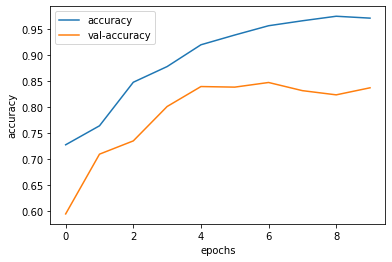

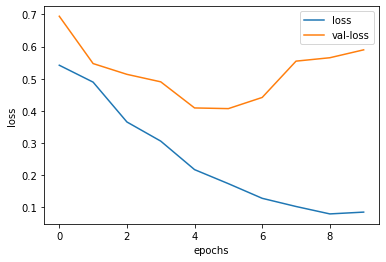

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val-'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')